# Assignment 5 - Risk
***

Author: Filipe Carvalho

Task: Write a program (or notebook) called assignment_5_risk (.py or .ipynb)

The program should simulates 1000 individual battle rounds in Risk (3 attacker vs 2 defender) and plots the result.

One battle round is one shake of the attacker and defender dice.

I am being vague about what it plot, I will leave that to you.

Rules of Risk

In Risk one army fights another. (using 6 sided dice)

In each battle round, the attacker can put forward up to three of their troops (3 dice).

The defender can use up to two of their defending troops (2 dice).

Each side looses troops depending on the following rules:

1) The two top dice dice are compared (ie the attackers top dice roll with the defenders top dice roll) 
- If the attackers dice is the same or lower they loose one troop otherwise the defender looses a troop (ie if the attackers dice is higher)
2) The next two highest dice from each side are then compared (ie the attackers second highest to the defenders second highest)
- If the attackers dice is the same or lower they loose one troop otherwise the defender looses a troop (ie if the attackers dice is higher)

In [12]:
# Import numpy and matplotlib

import numpy as np


import matplotlib.pyplot as plt

In [4]:
# define one battle
def battle ():
    # https://numpy.org/doc/2.0/reference/random/generated/numpy.random.randint.html
    # https://numpy.org/doc/stable/reference/generated/numpy.sort.html
    # Attacker rolls 3 dice
    # Dice are sorted in descending order
    attackerdice = np.sort(np.random.randint(1, 7, 3))[::-1]
    # Defender rolls 2 dice
    defenderdice = np.sort(np.random.randint(1, 7, 2))[::-1]

    # Initialize victories

    attackervic = 0
    
    defendervic = 0

    # Top dice from each group
    if attackerdice [0] > defenderdice [0]:
        attackervic += 1
    else:
        defendervic += 1

    # Second toppest dice
    if attackerdice [1] > defenderdice [1]:
        attackervic += 1
    else:
        defendervic += 1
    
    return attackervic, defendervic

In [8]:
# 1000 battle rounds
def total_battles(rounds=1000):
    # Start a dictionares with possible results in each round
    results = {"Attacker wins 2": 0, "Each wins 1": 0, "Defender wins 2": 0}

    # Set up the battles
    for i in range(rounds):
        # Execute a single battle round and capture the result
        attackervic, defendervic = battle ()
        # Determine the outcome of victories
        if attackervic == 2:
            results ["Attacker wins 2"] += 1
        elif defendervic == 2:
            results ["Defender wins 2"] += 1
        else:
            results ["Each wins 1"] += 1

    return results

# Simulate 1000 battle rounds
results = total_battles()

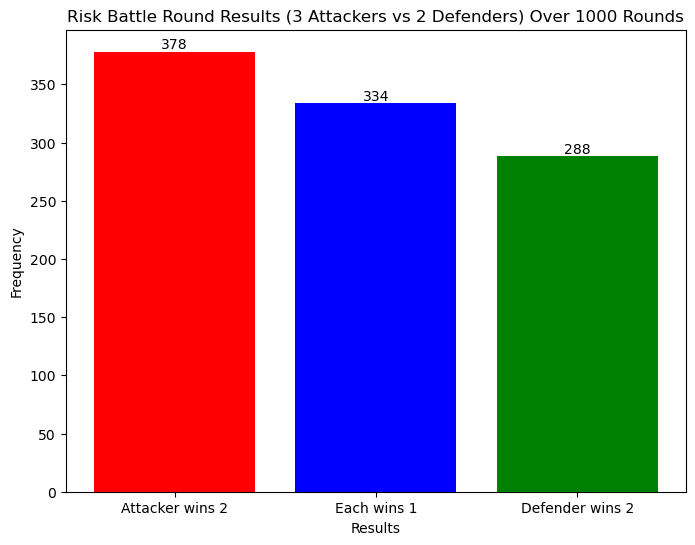

In [11]:
# Plotting the results
plt.figure(figsize=(8, 6))
bars = plt.bar(results.keys(), results.values(), color=['red', 'blue', 'green'])
# Adding labels to each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, yval, ha='center', va='bottom')  # va='bottom' positions the text above the bar
plt.title("Risk Battle Round Results (3 Attackers vs 2 Defenders) Over 1000 Rounds")
plt.xlabel("Results")
plt.ylabel("Frequency")
plt.show()


For the last few marks.

A more complicated version simulates a full series of rounds for armies of arbitrary sizes, until one side is wiped out,

and plots the results.

(This is open ended, so it is only for the last few marks)
